Word2Vec_Back2Basic
============

01. Word2Vec 설명과 tokenze 까지.
-------------------------

---

## 먼저, 단어를 표현하는 가장 쉬운 방법은 binary표현법이다.

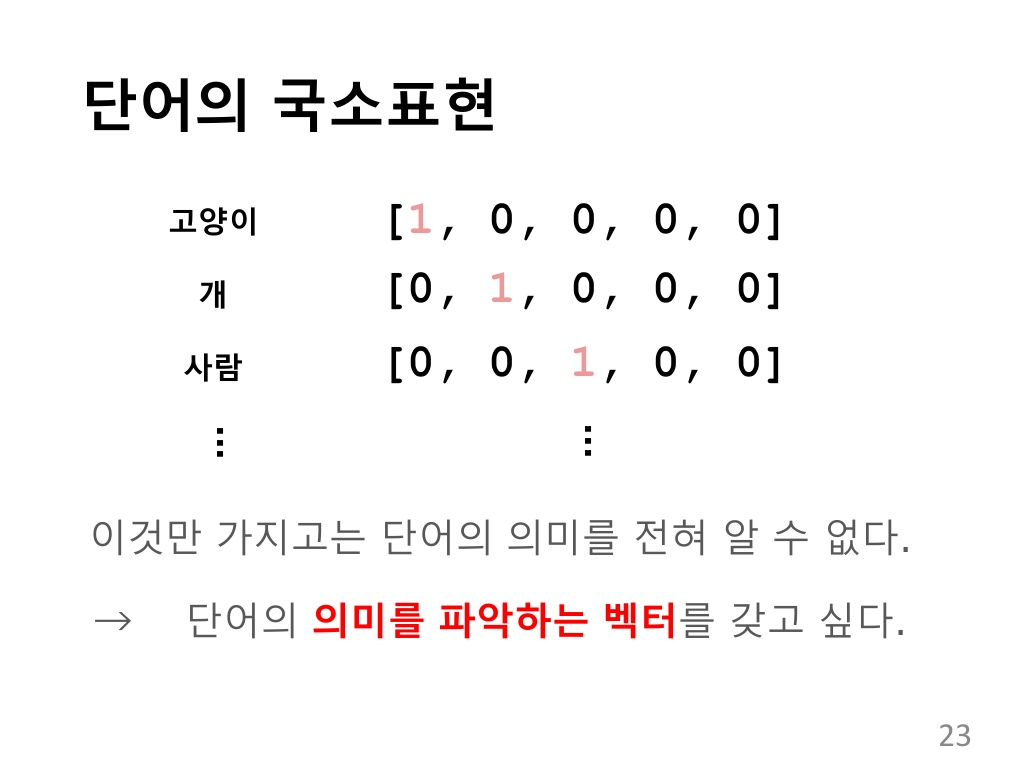

In [3]:
from IPython.display import Image
Image('images/국소표현2.png')

## "Co-occurrence"
### 두 단어가 정해진 구간 내에서 동시에 등장함

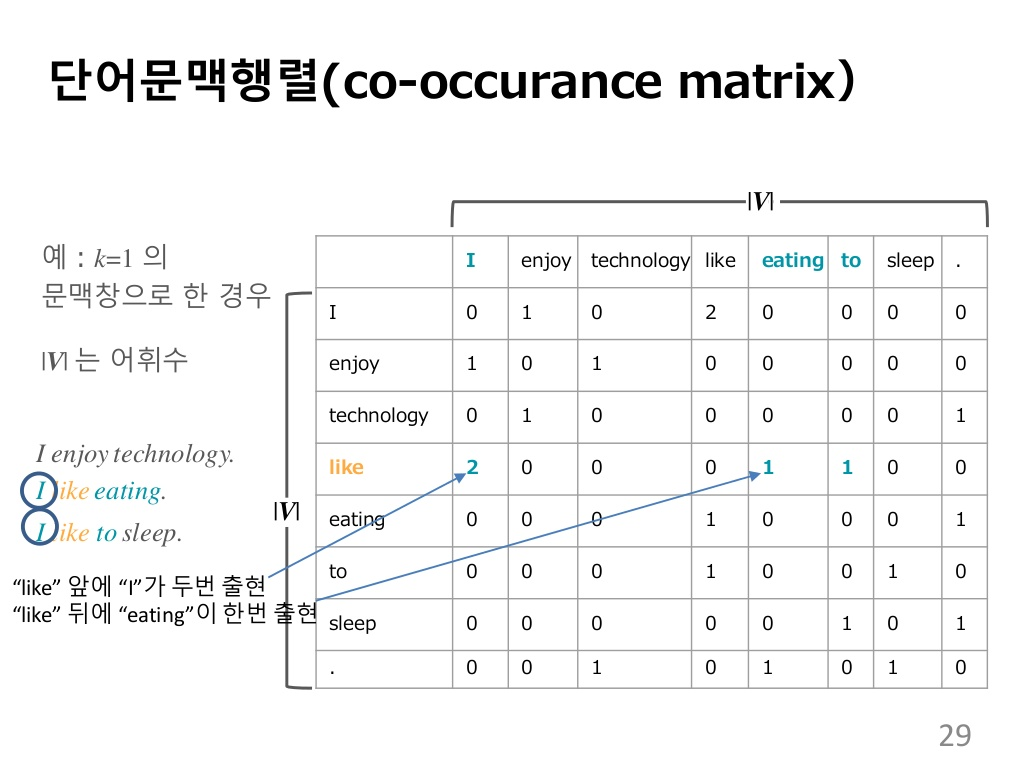

In [5]:
Image('images/cooccurnace.png')

## 하지만 단어가 많아지면 백터고 커지는 단점이 있다. 
### (수십만 차원..)

## n-gram

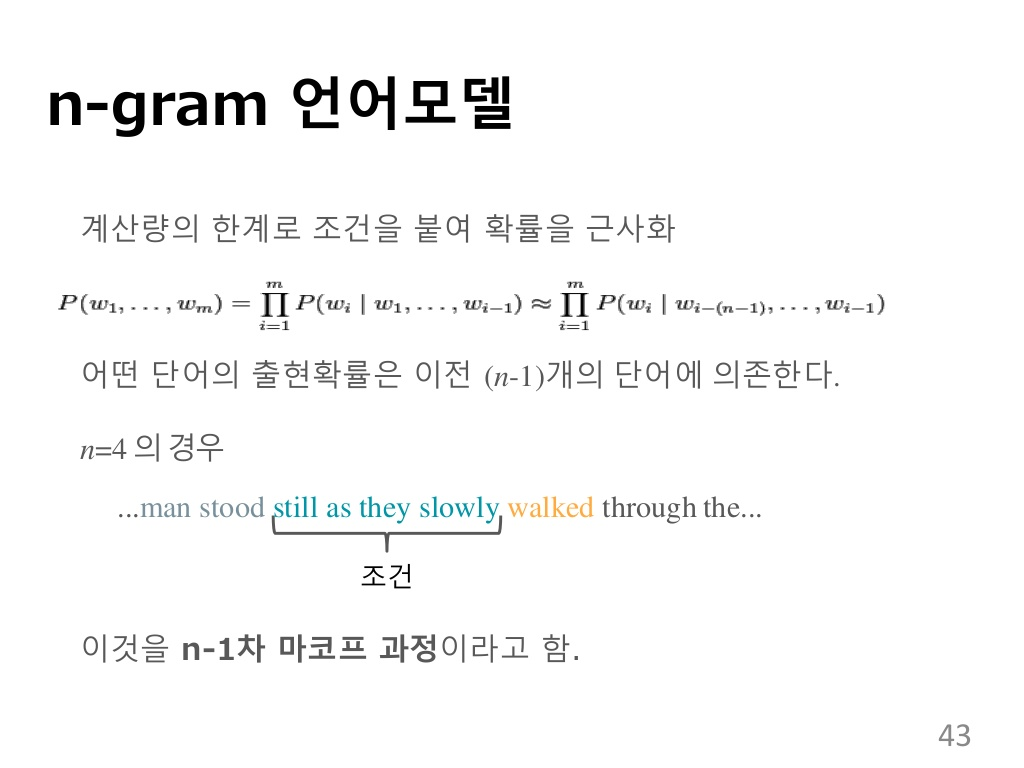

In [8]:
Image('images/ngram.png')

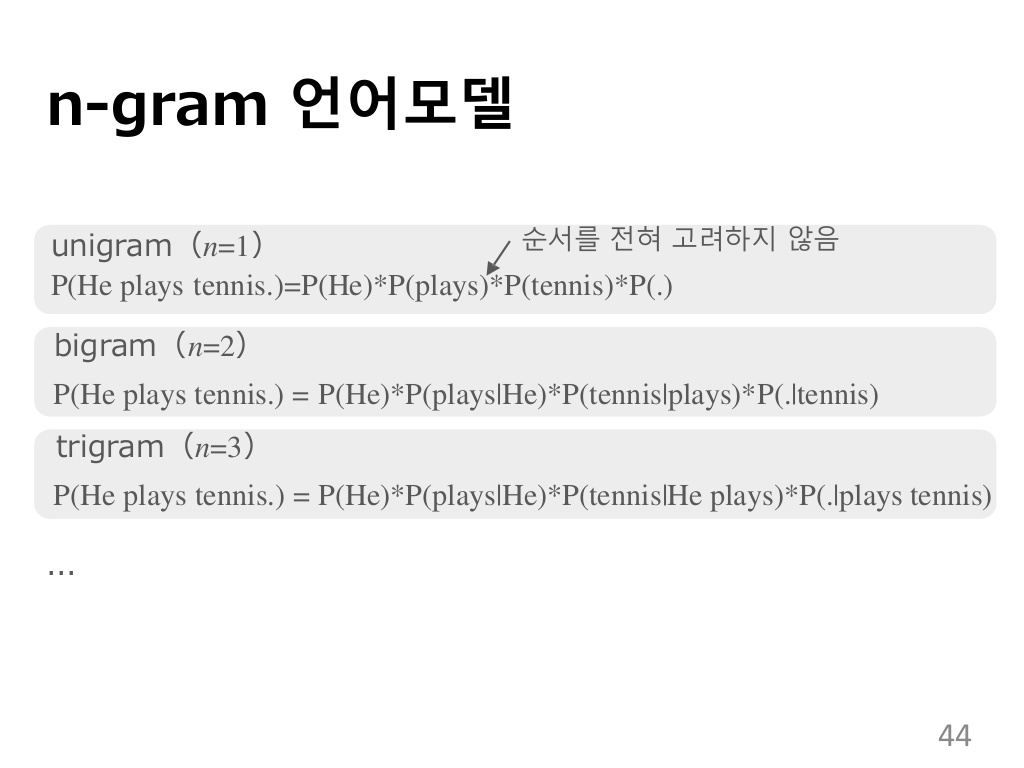

In [9]:
Image('images/ngram2.png')

## But!
### n-gram 에 있어서 문제점은 한번도 안나온 구(문장)은 확률이 0이 된다는 것이다.  

* he was happy - 6번출현
* she was joyful - 0번 출현   

### 인 경우 두 문장이 비슷함에도 불구하고 `she was joyful` 은 모델링이 안된다.  

---

## 그래서 나온 것이

## word2vec !!! [paper](https://arxiv.org/pdf/1301.3781.pdf)

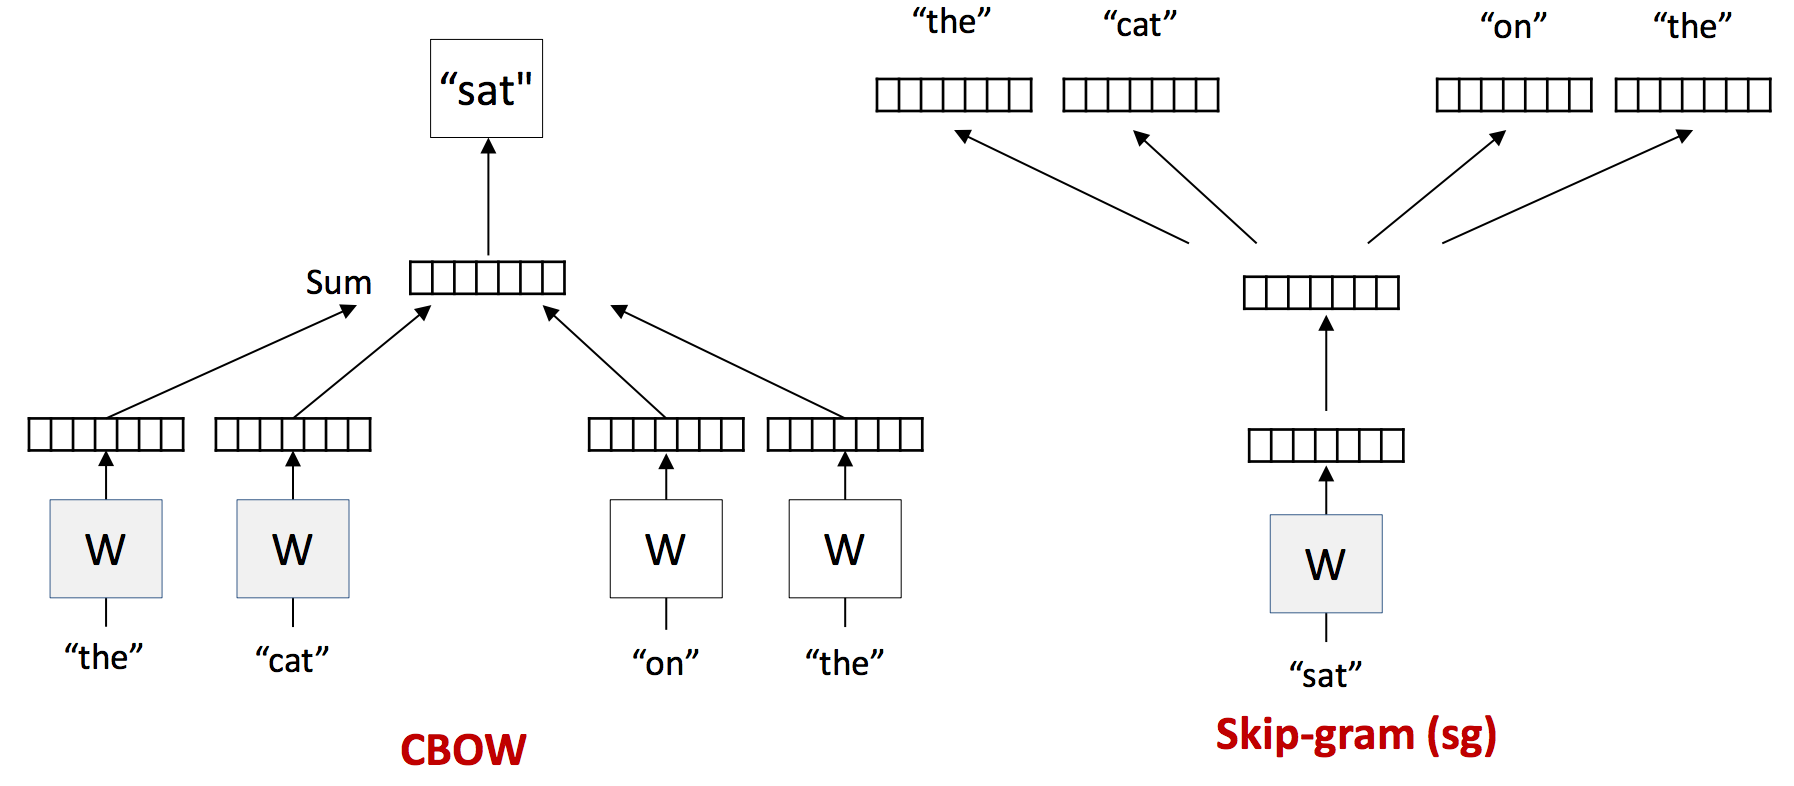

In [11]:
Image('images/w2v.png')

## doc2vec !!! [paper](http://cs.stanford.edu/~quocle/paragraph_vector.pdf)

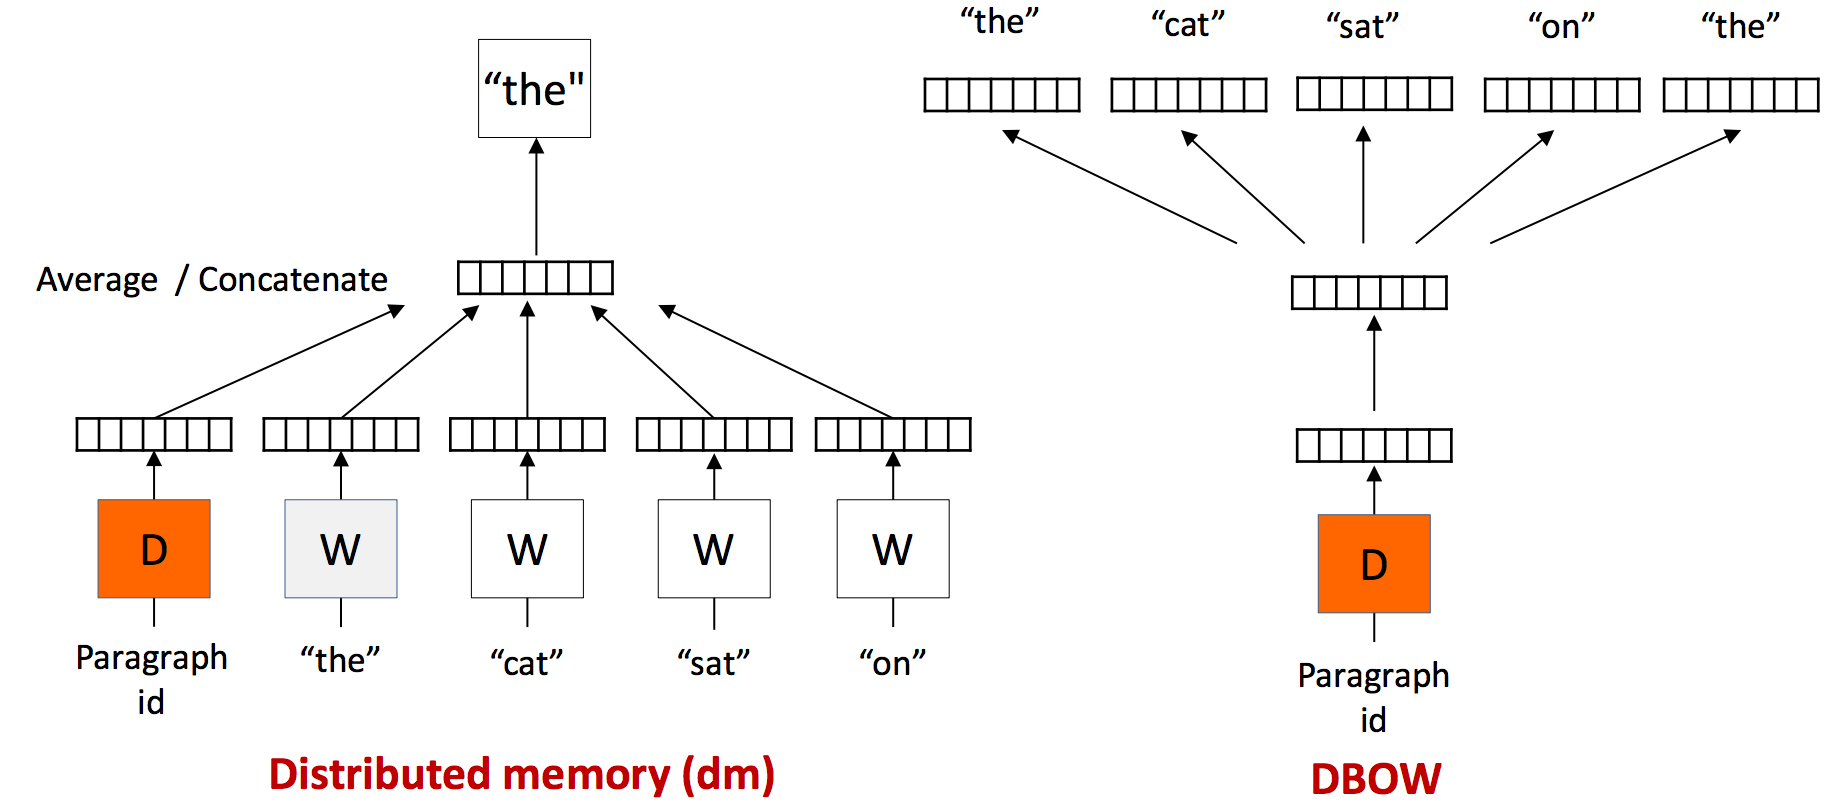

In [12]:
Image('images/d2v.png')

## 요약
텍스트의 의미를 벡터로 표현하는 몇 가지 방법:

구분 |Sparse, long vectors|	Dense, short vectors
:----|:--------------------|:--------------------------
단어|	1-hot-vectors	   | word2vec
문서|	bag-of-words(term existance, TF, TF-IDF 등)	       | doc2vec



---

### 모형 학습 방식
#### "과" 를 CBOW 방식으로 구하는 방식

## 1.
### 애국가 1절인 "동해물과 백두산이 ~..." 를 1-hot 백터화 시키면 (품사로 구분)  
### 다음과 같은 형태로 표현될 수 있다.

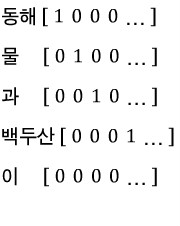

In [21]:
Image('images/수식1.jpg')

## 2.
### window size 와 embedding size를 먼저 정한다.
* 여기서는 Window-size : 2 로 간략화

###  Input  Vector에  Weight(in)를 곱해서 다름과 같은 Hidden layer 를 얻는다.

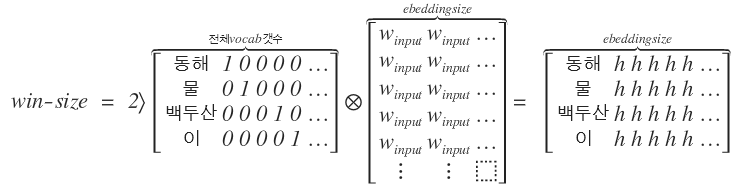

In [20]:
Image('images/수식2.png')

## 3.
### 구해진 Hidden layer 를 열방향으로 평균내
### 1 by Embed 사이즈의 Hidden layer로 변경한다.

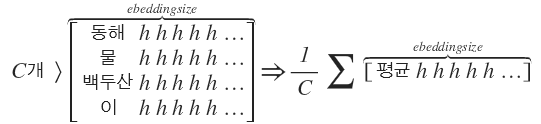

In [17]:
Image('images/수식3.png')

## 4.
### 수정된 Hidden layer에 Weight(out)을 곱해
### Output Vector를 구한다.

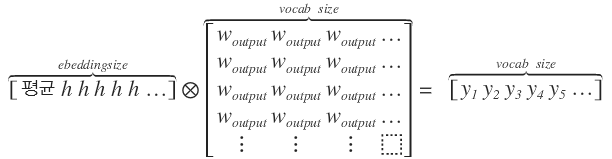

In [22]:
Image('images/수식4.png')

## 5.
### output vector를 softmax 방식으로 계산해  각 단어의 확률을 계산한다.   
### 만약 Y_3 의 값이 가장 크면 "과" 가 출력되는 것이다.

Skip-gram model은 CBOW의 정확히 반대로 생각하면 된다.

---

만약 단어의 수가 10만개와 같이 엄청 많다면 softmax가 부적절 할 수 있다.  
이 Output Vector Y에서 context단어를 추출하는 계산을 간단하게 하기위해서   
대표적을 다음과 같은 방법들이 있다.

## Hierarchical softmax

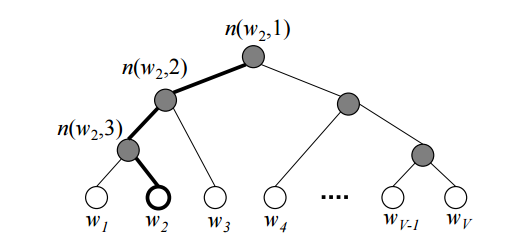

In [23]:
Image('images/hierarchical softmax.png')

softmax의 계산량이 V 라고 할 때 hierarchical softmax는 Log(V) 만으로 계산이 끝난다.  위 방식은 다음과 같은 계산으로 이루어 지는데 자세한 사항은 [[3]](https://arxiv.org/abs/1411.2738) 을 참고하자.

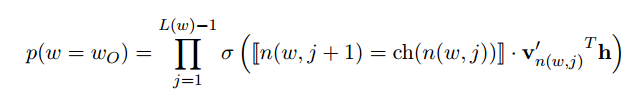

In [24]:
Image('images/hierarchical softmax2.png')

## Negative Sampling

negative sampling의 기본적인 개념은 전체 단어수 V 개를 전부 softmax 계산하지 말고 일부만 추출해서 계산하자는 방식이다. 일반적으로 5, 10 개로 하기때문에 10만개에서 확실히계산량이 줄어들기는 했다.

이 논문[1]에서는 5 ~ 20 단어를 선택하는 것이 작은 데이터 세트에서는 효과적이며 대규모 데이터 세트에서는 2 단어로만 해결할 수 있다고한다.

$$P(w_i) = \frac{  {f(w_i)}^{3/4}  }{\sum_{j=0}^{n}\left(  {f(w_j)}^{3/4} \right) }$$

먼저 각 단어들의 빈도수에 가중치를 둔  Unigram distribution 에 기반해 목표단어 "과"를 제외한 k개의 샘플을 뽑고  
우리가 타갯으로 정한 단어 "과" 와 쌍을이루는 조합을 샘플링된 단어와 생성하여 그것이 나올 확률을 계산한다.

작성자는 negative sampling 은 skip-gram에 기반한 방법이지만 Error function을 따로 만들어 사용하고있다. 자세한 사항은 [[4]](https://arxiv.org/abs/1402.3722) 을 참고하자.

---

## Referenc  

### [[1] Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/abs/1301.3781)
### [[2] Word2Vec Tutorial - The Skip-Gram Model](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)
### [[3] word2vec Parameter Learning Explained](https://arxiv.org/abs/1411.2738)
### [[4] word2vec Explained: deriving Mikolov et al.'s negative-sampling word-embedding method](https://arxiv.org/abs/1402.3722)